# Assignment_13.2

## In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set.

### Loading dataset and importing packages

In [1]:
import numpy as np
import pandas as pd # Panel data
import matplotlib.pyplot as plt #plots and graphs
import seaborn as sns
from sklearn.model_selection import train_test_split # train and test set creation
from sklearn.preprocessing import StandardScaler # feature scaling
from sklearn import datasets
boston = datasets.load_boston() # dataset
features = pd.DataFrame(boston.data, columns=boston.feature_names) #features of dataset
targets = boston.target # target variable

In [2]:
# first five rows of the features data
features.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
#first six rows of target variable
targets[0:6]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7])

In [4]:
features.info() # to know about schema about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
#rows and columns of the features
features.shape

(506, 13)

In [6]:
# Rows and columns of target variable
targets.shape

(506,)

### To check if columns have missing values are not

In [7]:
#missing values in data
features.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

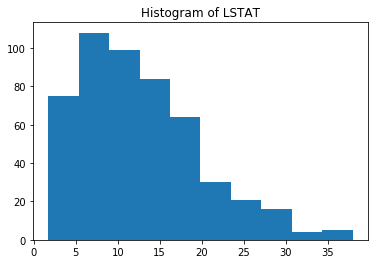

In [43]:
#histograms
plt.hist(features['LSTAT'])
plt.title('Histogram of LSTAT')
plt.show()

### histogram of each features

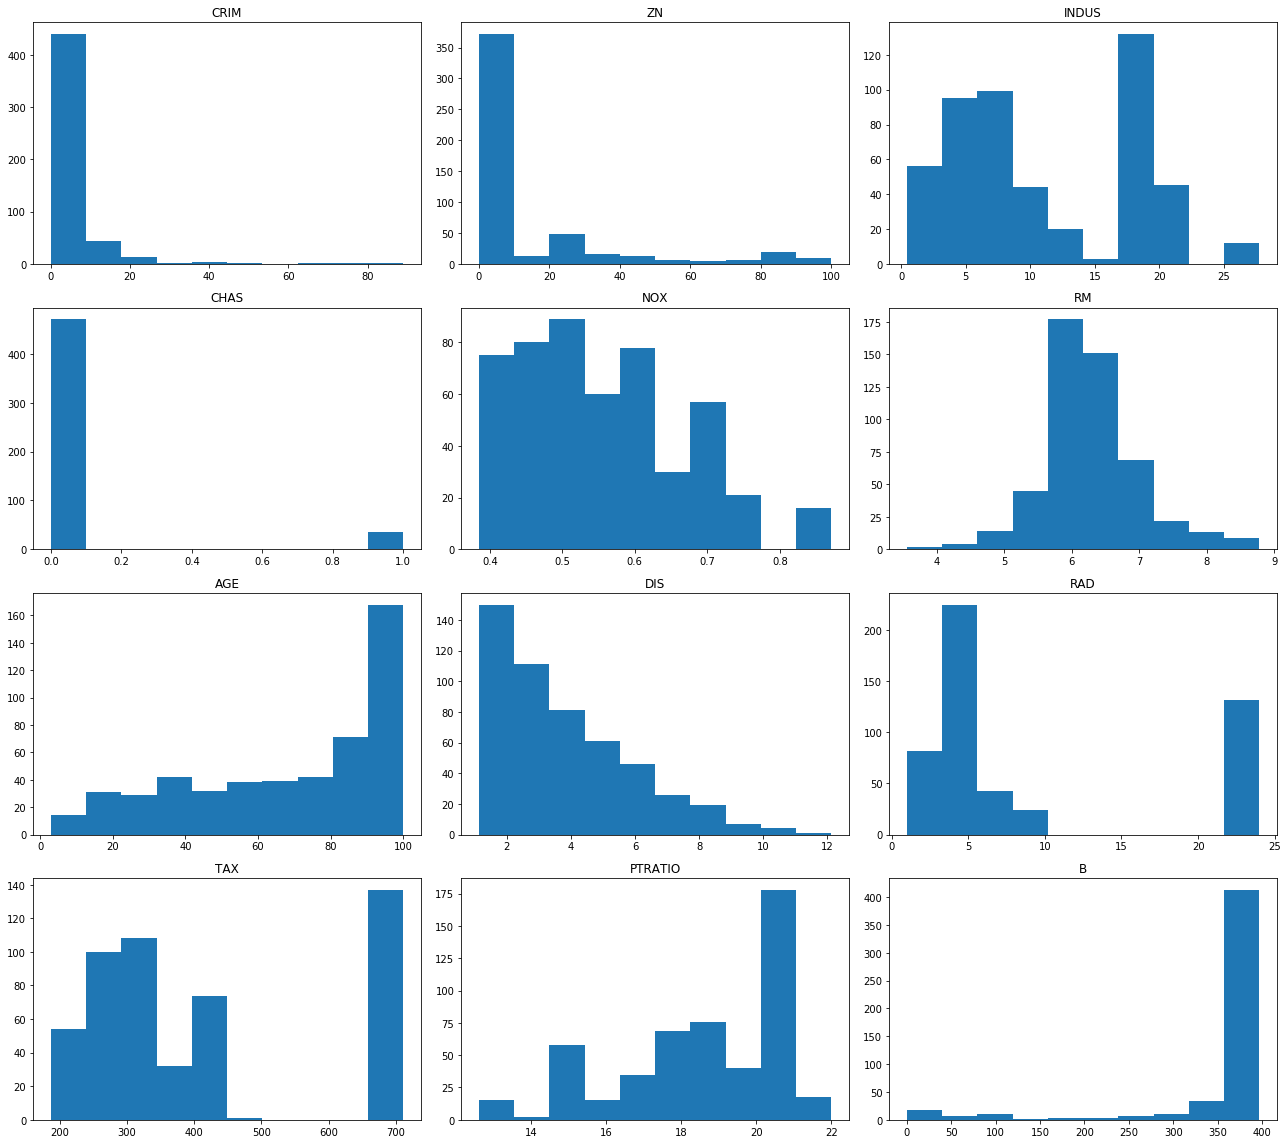

In [9]:
col=list(features.columns.values)
fig,axes=plt.subplots(4,3, figsize=(18,16))
for i, ax in enumerate(axes.flat):
    if i<13:
        ax.hist(features[col[i]])
        ax.set_title(col[i])
plt.tight_layout()


### Bar chart showing relationship of each features with targets

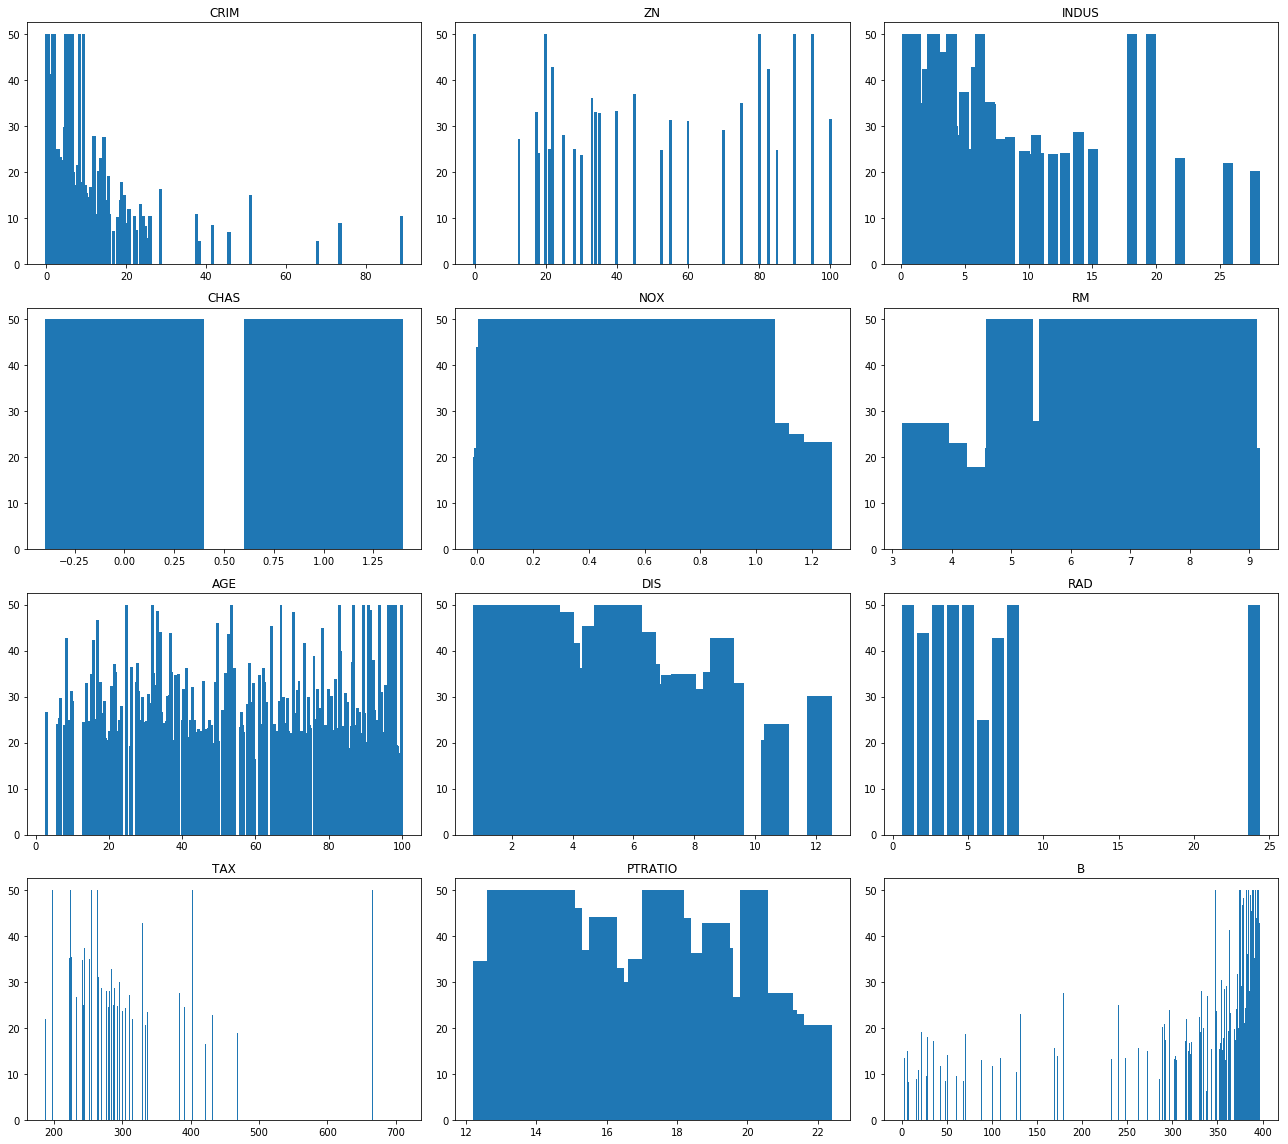

In [10]:
col=list(features.columns.values) # enlisting column names
fig,axes=plt.subplots(4,3, figsize=(18,16)) # size of the plot and number of subplots
for i, ax in enumerate(axes.flat):
    if i<13:
        ax.bar(features[col[i]],targets)
        ax.set_title(col[i])
plt.tight_layout()


In [11]:
# importing cross_val_score and train_test_split from scikit Learn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X=features #feature set 
y=targets # target set(price)

### The Standard Scaler is one of the most widely used scaling algorithms out there. It assumes that your data follows a Gaussian distribution (Gaussian distribution is the same thing as Normal distribution)The mean and the standard deviation are calculated for the feature and then the feature is scaled based on:

### (xi–mean(x))/stdev(x)

### The idea behind Standard Scaler is that it will transform your data, such that the distribution will have a mean value of 0 and a standard deviation of 1.

In [12]:
scaler= StandardScaler() #instantiate standard scaler 

In [13]:
scaler.fit(X) #fitting features

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
print(scaler.mean_)

[3.59376071e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01]


In [15]:
scaler.transform(X) #transform features using standard scaler

array([[-0.41771335,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41526932, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41527165, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41137448, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40568883, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41292893, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

### Train test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Random forest regressor for prediction

In [17]:
# as per the instruction given in the problem statement we are going to use Random forest regressor as our output is continuous 
# variable not categorical
from sklearn.ensemble import RandomForestRegressor


In [44]:
#instantiating Random forest regressor w
regr = RandomForestRegressor(n_estimators=10,max_depth=4, random_state=0)

In [45]:
regr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [46]:
print(regr.feature_importances_)

[0.03196561 0.00202724 0.00083092 0.         0.02164941 0.56327522
 0.00220385 0.06142699 0.00304021 0.00362884 0.00928404 0.01367428
 0.28699339]


In [47]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [48]:
y_pred= regr.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_error
training_RMSE=np.sqrt(mean_squared_error(y_test, y_pred))
print("training accuracy of the model is %f" %(np.sqrt(mean_squared_error(y_test, y_pred))))

training accuracy of the model is 4.586321


### K fold cross validation K=10

In [50]:
cv_score= cross_val_score(RandomForestRegressor(n_estimators=10,max_depth=4, random_state=0),X,y,scoring='neg_mean_squared_error', cv=10)

In [51]:
RMSE=np.sqrt(cv_score.mean()* -1)

In [52]:
RMSE # root mean squared error

5.15488771594716

In [60]:
print("10 fold cross validation using random forest regressor gives {:2f} RMSE value".format(RMSE))

10 fold cross validation using random forest regressor gives 5.154888 RMSE value


In [28]:
cv_score

array([-12.24830009,  -4.85480793,  -4.79194983, -22.22333343,
       -13.39263987, -21.49808   ,  -8.46704212, -97.86970097,
       -30.97573802, -15.96634173])

In [53]:
fest_imp=pd.DataFrame([features.columns.values,regr.feature_importances_])

In [54]:
fest_imp

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,0.0209593,0,0.00172508,0,0.0120901,0.276511,0.0025814,0.0542706,0.00380333,0.0155424,0.0189119,0.00595284,0.587652


### Tuning hyper parameters

In [55]:
regressor = RandomForestRegressor(max_depth=5,n_estimators=100, max_features=None, random_state=0,max_leaf_nodes=2,min_impurity_decrease=0.0, min_impurity_split=None,
                                  min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0)

In [56]:
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=None, max_leaf_nodes=2, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [57]:
# predicting test set using regressor(Tuned model)
y_pred1= regressor.predict(X_test)

In [72]:
#RMSE of the tuned model
tuned_RMSE=np.sqrt(mean_squared_error(y_test, y_pred1))

#### no improvement in the model after tuning some of the parameters infact model performs poor after tuning


In [65]:
#calculating R square value
from sklearn import metrics
Rsquare=metrics.r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average')

In [67]:
print("goodness of the fit of model is ",Rsquare)

 goodness of the fit of model is  0.7416831654210165


In [75]:
#Printing all results at one go

print("training RMSE",training_RMSE)
print("validation RMSE",RMSE)
print("RMSE after parameter tuning",tuned_RMSE)
print("goodness of the fit of model is ",Rsquare)

training RMSE 4.5863205975135966
validation RMSE 5.15488771594716
RMSE after parameter tuning 6.488685496108184
goodness of the fit of model is  0.7416831654210165


#### cross validation root mean squared error without hyper parameter tuning  is increased but not much as compared  training RMSE that means model works on unseen data and less prone to overfitting.